# Corpus

Los corpus son una herramienta esencial en el Procesamiento de Lenguaje Natural. Éstos representan los datos empíricos con los que se construyen los modelos y es a partir de ellos que la computadora es capaz de extraer información para poder realizar procesos que puedan emular parte del lenguaje natural.

La paquetería NLTK cuenta con varios corpus en diferentes lenguaes. En este ejemplo trabajaremos con el corpus CESS, que es un corpus monolingüe disponible en español.

In [1]:
import nltk
from nltk.corpus import cess_esp #Corpus español
from collections import Counter
from wordcloud import WordCloud #Paquetería para visualizar palabras
import matplotlib.pyplot as plt

El corpus CESS en español se puede encontrar en diferentes formatos. Podemos encontrar la lista de palabras que componen el texto, así como la lista de sentencias que lo componen. También podemos encontrar el corpus etiquetado con POS (Parts of Speech):

In [2]:
#Palabras en el corpus
print(cess_esp.words())
#Corpus de sentencias
print(cess_esp.sents())
#Corpus etiquetado
print(cess_esp.tagged_sents())

['El', 'grupo', 'estatal', 'Electricité_de_France', ...]
[['El', 'grupo', 'estatal', 'Electricité_de_France', '-Fpa-', 'EDF', '-Fpt-', 'anunció', 'hoy', ',', 'jueves', ',', 'la', 'compra', 'del', '51_por_ciento', 'de', 'la', 'empresa', 'mexicana', 'Electricidad_Águila_de_Altamira', '-Fpa-', 'EAA', '-Fpt-', ',', 'creada', 'por', 'el', 'japonés', 'Mitsubishi_Corporation', 'para', 'poner_en_marcha', 'una', 'central', 'de', 'gas', 'de', '495', 'megavatios', '.'], ['Una', 'portavoz', 'de', 'EDF', 'explicó', 'a', 'EFE', 'que', 'el', 'proyecto', 'para', 'la', 'construcción', 'de', 'Altamira_2', ',', 'al', 'norte', 'de', 'Tampico', ',', 'prevé', 'la', 'utilización', 'de', 'gas', 'natural', 'como', 'combustible', 'principal', 'en', 'una', 'central', 'de', 'ciclo', 'combinado', 'que', 'debe', 'empezar', 'a', 'funcionar', 'en', 'mayo_del_2002', '.'], ...]
[[('El', 'da0ms0'), ('grupo', 'ncms000'), ('estatal', 'aq0cs0'), ('Electricité_de_France', 'np00000'), ('-Fpa-', 'Fpa'), ('EDF', 'np00000'), ('

En este caso, utilizaremos únicamente las palabras:

In [3]:
#Guarda el corpus de palabras
corpus = cess_esp.words()

print(corpus)

['El', 'grupo', 'estatal', 'Electricité_de_France', ...]


En el corpus, las palabras se encuentran tanto en mayúsculas como en minúsculas, pero para el procesamiento de este corpus buscamos que todas las palabras se encuentren en minúsculas: esto reduce el número de tipos, pues ahora no importa si una palabra está después de un punto o en medio de una sentencia.

In [4]:
#Pasar todo caracter a minúsculas
corpus = [w.lower() for w in corpus]

print(corpus[:100])

['el', 'grupo', 'estatal', 'electricité_de_france', '-fpa-', 'edf', '-fpt-', 'anunció', 'hoy', ',', 'jueves', ',', 'la', 'compra', 'del', '51_por_ciento', 'de', 'la', 'empresa', 'mexicana', 'electricidad_águila_de_altamira', '-fpa-', 'eaa', '-fpt-', ',', 'creada', 'por', 'el', 'japonés', 'mitsubishi_corporation', 'para', 'poner_en_marcha', 'una', 'central', 'de', 'gas', 'de', '495', 'megavatios', '.', 'una', 'portavoz', 'de', 'edf', 'explicó', 'a', 'efe', 'que', 'el', 'proyecto', 'para', 'la', 'construcción', 'de', 'altamira_2', ',', 'al', 'norte', 'de', 'tampico', ',', 'prevé', 'la', 'utilización', 'de', 'gas', 'natural', 'como', 'combustible', 'principal', 'en', 'una', 'central', 'de', 'ciclo', 'combinado', 'que', 'debe', 'empezar', 'a', 'funcionar', 'en', 'mayo_del_2002', '.', 'la', 'electricidad', 'producida', 'pasará', 'a', 'la', 'red', 'eléctrica', 'pública', 'de', 'méxico', 'en_virtud_de', 'un', 'acuerdo', 'de', 'venta']


#### Tokens y tipos

Podemos ver el número de tokens y tipos con los que cuenta el corpus. Asimismo, podemos observar la relación entre tipos y tokens, lo que nos da información de en qué medida se utilizan los tipos.

In [5]:
tokens = len(corpus)     #Núm tokens
tipos = len(set(corpus)) #Núm tiposs

print('Número de tokens: {} \nNúmero de tipos {}'.format(tokens, tipos))
#Relación tipo/token
print('Relación tipos/tokens: {}'.format(tipos/tokens))

Número de tokens: 192686 
Número de tipos 24497
Relación tipos/tokens: 0.12713430140228144


Podemos visualizar los tipos en forma de nube para darnos una idea de cuáles son aquellos tipos que más se utilizan.

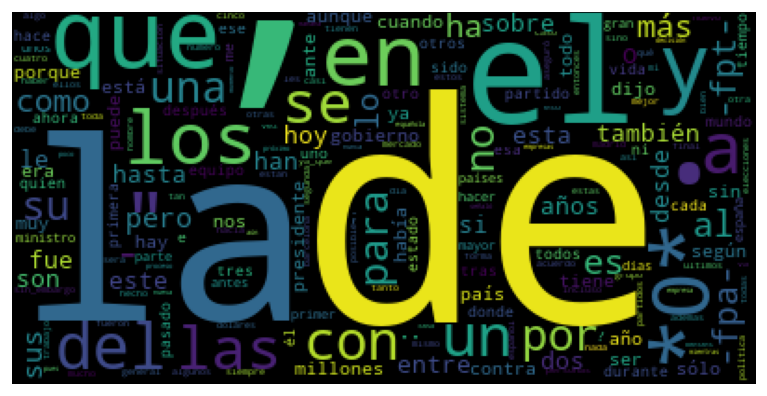

In [6]:
mycloud = WordCloud()

mycloud.generate_from_frequencies(Counter(corpus))

plt.figure(figsize=(8,6), dpi=120)
plt.imshow(mycloud)
plt.axis("off")
plt.show()

## Concordancias

Las concordancias o KWIC (Key Word In Context) nos permiten hacer búsquedas dentro de un corpus y obtener los contextos de aparición de las palabras. Las palabras se nos presentan alineadas en una ventana de un tamaño determinado. Con la paquetería de NLTK se pueden hacer estas búsquedas de manera fácil.

In [7]:
#Indexar el corpus para hacer búsquedas
index = nltk.text.ConcordanceIndex(corpus)

In [8]:
#Palabra de búsqueda
kw = 'democracia'
#Realizar e imprimir las concordancias
index.print_concordance(kw, width=100, lines=10)

Displaying 10 of 31 matches:
artido en madrid desde la instauración de la democracia . insuficiente fue el crecimiento del psoe e
esultado del partido en madrid en 25 años de democracia " , dijo a efe el presidente del pp en la re
cativa , materia esencial para consolidar la democracia y lograr el desarrollo social . vicumbre -fp
el_mar , dedicada a la " gobernabilidad y la democracia " , reafirmó el compromiso con el sistema de
s como " marco de la gobernabilidad para una democracia eficiente y participativa " . se puso como o
s bases socioeconómicas para posibilitar una democracia integral , así_como asumir las oportunidades
 -fpt- dedicado a " los valores éticos de la democracia " , el texto final condenó expresamente por 
pañola " ha dado un importante respaldo a la democracia , al estado_de_derecho y al gobierno de josé
nes contra fiyi por abandonar la senda de la democracia . el primer ministro israelí , ehud_barak , 
 " pedagógica " medida como un triunfo de la democracia venezo

## Stopwords

Sin embargo, notamos que los tipos que más aparecen son preposiciones y/o artículos, los cuales no aportan información específica sobre el texto. Por tanto, tenemos que eliminar estas palabras o stopwords con el objetivo de que no metan ruido en nuestro análisis.

In [9]:
from nltk.corpus import stopwords #Listas de stopwords

#Stopwords para español
stopwords_list = stopwords.words('spanish')
print(stopwords_list)

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

In [10]:
#Función para remover stopwords
def remove_stopwords(corpus):
    return [w for w in corpus if w not in stopwords_list]

#Corpus sin stopwords
corpus_no_stopwords = remove_stopwords(corpus)
print(corpus_no_stopwords[:100])

['grupo', 'estatal', 'electricité_de_france', '-fpa-', 'edf', '-fpt-', 'anunció', 'hoy', ',', 'jueves', ',', 'compra', '51_por_ciento', 'empresa', 'mexicana', 'electricidad_águila_de_altamira', '-fpa-', 'eaa', '-fpt-', ',', 'creada', 'japonés', 'mitsubishi_corporation', 'poner_en_marcha', 'central', 'gas', '495', 'megavatios', '.', 'portavoz', 'edf', 'explicó', 'efe', 'proyecto', 'construcción', 'altamira_2', ',', 'norte', 'tampico', ',', 'prevé', 'utilización', 'gas', 'natural', 'combustible', 'principal', 'central', 'ciclo', 'combinado', 'debe', 'empezar', 'funcionar', 'mayo_del_2002', '.', 'electricidad', 'producida', 'pasará', 'red', 'eléctrica', 'pública', 'méxico', 'en_virtud_de', 'acuerdo', 'venta', 'energía', 'eaa', 'comisión_federal_de_electricidad', '-fpa-', 'cfe', '-fpt-', 'duración', '25', 'años', '.', 'edf', ',', 'quiso', 'revelar', 'cuánto', '*0*', 'pagó', 'participación', 'mayoritaria', 'eaa', ',', 'intervendrá', 'asistente', 'construcción', 'altamira_2', ',', 'posterior

Ahora, al visualizar las nubes de palabras, podemos observar que aparecen palabras que muestran más contenido y que, por tanto, nos pueden dar más información sobre el corpus que estamos analizando.

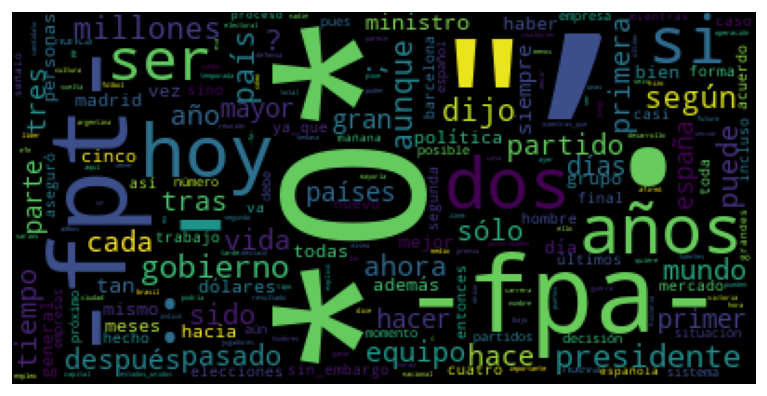

In [11]:
mycloud_no_stopwords = WordCloud()

mycloud_no_stopwords.generate_from_frequencies(Counter(corpus_no_stopwords))

plt.figure(figsize=(8,6), dpi=120)
plt.imshow(mycloud_no_stopwords)
plt.axis("off")
plt.show()

## Corpus paralelos

Los corpus paralelos son una herramienta primordial para tareas del PLN como la traducción automática. Aquí mostramos una paquetería de corpus paralelos en lenguas mexicanas. En primer lugar instalamos dicha paquetería.

In [12]:
!pip3 install elotl

Esta paquetería cuenta con corpus paralelos español-náhuatl y español-otomí.

In [13]:
import elotl.corpus

#Cada elemento de esta lista corresponde a una oración paralela del corpus más información extra del par de oraciones
corpus_na = elotl.corpus.load('axolotl')  #español-náhuatl 
corpus_ot = elotl.corpus.load('tsunkua')  #español-otomi 

En el corpus paralelo, cada oración en una lengua se encuentra alineada con su correspondiente oración en la otra lengua.

In [14]:
for sent in corpus_na[:5]:
    print('-- {} \t {} --'.format(sent[0], sent[1]))

-- Vino a iluminar el sol y allí fue a ver a su 	 tlaminako tonati uan noponi kiitato --
-- Y así, cuando hizo su ofrenda de fuego, se sienta delante de los demás y una persona se queda junto a él. 	 Auh in ye yuhqui in on tlenamacac niman ye ic teixpan on motlalia ce tlacatl itech mocaua. --
-- ¿Si es jade, si es oro, acaso no tendrá que ir allá? 	 ¿In chalchihuitl, teocuitlatl, mach ah ca on yaz? --
-- Y cuando el Sol estuvo solo en el cielo, enseguida comenzó a amarillear, y fue oscureciendo poco a poco hasta que el Sol desapareció, cuando frente a él fue a colocarse la Luna, alcanzando a cubrir el disco del Sol, y así lentamente desapareció el Sol. 	 Auh yn oyuh in yoca hualmotlalli tonatiuh ylhuicatitech, niman yc peuh yn huel ye tlacoçahuia, çan ihuiantzin ye tlayohuatiuh ynic ye poliuhtiuh tonatiuh, ynic huel ixpan || 147 ye yatiuh ynic huel ixpan ye onmomana metztli, huel cacitimoman ynic yahualtic tonatiuh ynic quixtzacuilli, y çan ihuiantzin huel onpolihuico tonatiuh. --
-- E

In [15]:
for sent in corpus_ot[:5]:
    print('-- {} \t {} --'.format(sent[0], sent[1]))

-- Arde, se calcina su corazón y su cuerpo está doliente. De igual modo a mí me arde y se calcina mi corazón. 	 Zo̱, da zot'i ri ndäte ne ri ngo̱k'ei yabu̱ xa ñ'u̱. Mahye̱gi nugi zo̱ ne da zät'i ma ndäte. --
-- Luego ya vienen, de nuevo vienen en seguimiento de Citlaltépec. A Tlacopan. Allí se establecen en el Palacio. 	 Ebu̱ ba ehe man'aki ba te̱nga ra t'o̱ho̱  ra thuhu ra Citlaltépec. Tlacopan, Nubia ba o̱t'ra b'u̱i ha ra ndo̱m'ihmu. --
-- y mirad que no lo descubráis a hijo de madre, so pena de las graves penas de tirar hasta los cimientos de casas, 	 y mirad que no lo descubráis a hijo de madre, so pena de las graves penas de tirar hasta los cimientos de casas, --
-- En este tiempo viene una embajada del rg de Acolhuacan, Tecocoltzin. Los que vienen a conferenciar en Tlatelolco son: 	 Di geb'u̱, ba ehe̱ n'a ra m'e̱hni ra bo̱nahmu nuni Acolhuacan, mra tuhu ra Tecocoltzin. Nu'u̱ bi ñ'ehe da ñäui ko ya jä'i mi ñ'ehe nuni Tlatelolco ge nuya: --
-- Por cierto serás esclava, serás person